In [1]:
!pip install mlxtend

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import math
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [3]:
# cd D:\Group-7

In [4]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 10000)
parkingdata.size

130000

In [5]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
11802881,Banks,FLINDERS LANE,QUEEN STREET,ELIZABETH STREET,4,1789S,18/09/2012 12:45:44 PM,18/09/2012 12:52:24 PM,400,1/2P MTR M-SAT 7:30-19:30,0,669,7472
10891448,Regency,SPRING STREET,Lt LONSDALE STREET,LONSDALE STREET,1,C116,21/08/2012 03:35:07 PM,21/08/2012 04:11:06 PM,2159,2P MTR M-SAT 7:30-20:30,0,1288,7309
8533716,Southbank,COVENTRY STREET,WELLS STREET,ST KILDA ROAD,4,9279S,12/06/2012 01:23:07 PM,12/06/2012 01:46:16 PM,1389,LZ 30M M-F 7:30-18:30,0,547,4287
8151077,Titles,LA TROBE STREET,WILLIAM STREET,QUEEN STREET,3,3868N,31/05/2012 11:21:29 AM,31/05/2012 11:28:16 AM,407,2P MTR M-F 7:30-16:00,0,856,2149
10070169,Queensberry,QUEENSBERRY STREET,ERROL STREET,LEVESON STREET,1,C7758,27/07/2012 01:58:36 PM,27/07/2012 02:06:00 PM,444,1P MTR M-F 7:30-18:30,0,1175,5326


In [6]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
2671996,Titles,LA TROBE STREET,QUEEN STREET,ELIZABETH STREET,4,3835S,13/12/2011 05:51:03 PM,13/12/2011 05:54:50 PM,227,1P MTR M-F 9:30-19:30,0,856,2197
411043,Victoria Market,THERRY STREET,QUEEN STREET,ELIZABETH STREET,1,C7040,13/10/2011 08:26:22 AM,13/10/2011 08:40:45 AM,863,1P MTR M-SAT 7:30-19:30,0,1346,3757
8961956,RACV,Lt COLLINS STREET,WILLIAM STREET,QUEEN STREET,3,2228N,25/06/2012 09:50:21 AM,25/06/2012 10:18:22 AM,1681,1P MTR M-SAT 7:30-19:30,0,911,1162
9020471,Titles,Lt LONSDALE STREET,WILLIAM STREET,QUEEN STREET,3,3506N,26/06/2012 03:54:20 PM,26/06/2012 05:57:00 PM,7360,2P TKT A M-SAT 7:30-20:30,0,926,6935
10814682,Courtney,COBDEN STREET,O'CONNELL STREET,VICTORIA STREET,2,5246E,19/08/2012 08:51:34 AM,19/08/2012 10:09:54 AM,4700,1P RPA M-SUN 7:30-23:00,1,520,5908


## Data Wrangling

In [7]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [8]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1041
Victoria Market     737
Princes Theatre     695
Southbank           639
Regency             623
The Mac             609
Hyatt               556
Titles              548
Rialto              471
City Square         466
County              409
Magistrates         402
Banks               392
Hardware            385
Courtney            383
Chinatown           374
Spencer             338
RACV                312
Jolimont            295
Supreme             209
Tavistock            59
Docklands            54
West Melbourne        3
Name: Area Name, dtype: int64

In [9]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
11802881,BANKS,FLINDERS LANE,QUEEN STREET,ELIZABETH STREET,4,1789S,18/09/2012 12:45:44 PM,18/09/2012 12:52:24 PM,400,1/2P MTR M-SAT 7:30-19:30,0,669,7472
10891448,REGENCY,SPRING STREET,LT LONSDALE STREET,LONSDALE STREET,1,C116,21/08/2012 03:35:07 PM,21/08/2012 04:11:06 PM,2159,2P MTR M-SAT 7:30-20:30,0,1288,7309
8533716,SOUTHBANK,COVENTRY STREET,WELLS STREET,ST KILDA ROAD,4,9279S,12/06/2012 01:23:07 PM,12/06/2012 01:46:16 PM,1389,LZ 30M M-F 7:30-18:30,0,547,4287
8151077,TITLES,LA TROBE STREET,WILLIAM STREET,QUEEN STREET,3,3868N,31/05/2012 11:21:29 AM,31/05/2012 11:28:16 AM,407,2P MTR M-F 7:30-16:00,0,856,2149
10070169,QUEENSBERRY,QUEENSBERRY STREET,ERROL STREET,LEVESON STREET,1,C7758,27/07/2012 01:58:36 PM,27/07/2012 02:06:00 PM,444,1P MTR M-F 7:30-18:30,0,1175,5326


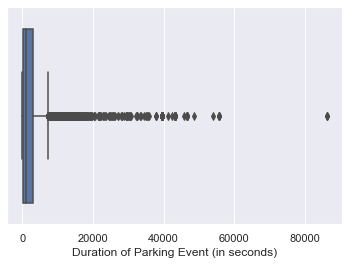

In [10]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])


In [11]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [12]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             914
QUEEN STREET                760
LA TROBE STREET             579
COLLINS STREET              575
FRANKLIN STREET             565
EXHIBITION STREET           533
ELIZABETH STREET            495
RUSSELL STREET              475
BOURKE STREET               414
LT LONSDALE STREET          348
FLINDERS LANE               295
SPRING STREET               279
KING STREET                 268
LT COLLINS STREET           264
ERROL STREET                227
WILLIAM STREET              198
COVENTRY STREET             181
LT BOURKE STREET            164
A'BECKETT STREET            151
VICTORIA STREET             140
FLINDERS STREET             132
QUEENSBERRY STREET          126
SPENCER STREET              126
CAPEL STREET                107
THERRY STREET               106
ALBERT STREET               106
LEVESON STREET               91
KAVANAGH STREET              91
DORCAS STREET                83
GRANT STREET                 82
O'CONNELL STREET             72
COBDEN S

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            926
QUEEN STREET           837
WILLIAM STREET         658
QUEENSBERRY STREET     657
RUSSELL STREET         504
SWANSTON STREET        497
SPENCER STREET         472
EXHIBITION STREET      444
LT LONSDALE STREET     436
LT COLLINS STREET      348
LONSDALE STREET        345
VICTORIA STREET        318
BOURKE STREET          283
COLLINS STREET         272
LT BOURKE STREET       260
ELIZABETH STREET       254
FLINDERS LANE          193
LA TROBE STREET        190
WILLAM STREET          153
THERRY STREET          141
WELLS STREET           139
FRANKLIN STREET        118
A'BECKETT STREET       112
FLINDERS STREET         97
DODDS STREET            96
ERROL STREET            95
STURT STREET            89
O'CONNELL STREET        82
SOUTHBANK BOULEVARD     82
BALSTON STREET          75
KINGS WAY               66
PELHAM STREET           58
VICTORIA PARADE         56
HOWARD STREET           50
COBDEN STREET           49
PEEL STREET             47
ALBERT STREET           44
G

In [14]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET        886
ELIZABETH STREET      859
VICTORIA STREET       837
QUEEN STREET          798
EXHIBITION STREET     490
KING STREET           472
LONSDALE STREET       462
SPRING STREET         448
RUSSELL STREET        407
FLINDERS LANE         369
COLLINS STREET        348
LT BOURKE STREET      345
LT COLLINS STREET     283
BOURKE STREET         260
SWANSTON STREET       254
LT LONSDALE STREET    220
LA TROBE STREET       215
FLINDERS STREET       193
DODDS STREET          147
FRANKLIN STREET       141
ST KILDA ROAD         139
LEVESON STREET         95
POWER STREET           93
LANSDOWNE STREET       91
QUEENSBERRY STREET     90
THERRY STREET          77
WELLS STREET           73
A'BECKETT STREET       66
WALSH STREET           65
HAWKE STREET           57
CAPEL STREET           44
STURT STREET           42
ELM STREET             40
MILES STREET           40
GISBORNE STREET        39
DUDLEY STREET          39
STANLEY STREET         31
HOWARD STREET          30
EADES STREET

In [15]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [16]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [17]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [18]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
11802881,BANKS,FLINDERS LANE,QUEEN STREET,ELIZABETH STREET,4,1789S,2012-09-18 12:45:44,2012-09-18 12:52:24,400,1/2P MTR M-SAT 7:30-19:30,0,669,7472
10891448,REGENCY,SPRING STREET,LT LONSDALE STREET,LONSDALE STREET,1,C116,2012-08-21 15:35:07,2012-08-21 16:11:06,2159,2P MTR M-SAT 7:30-20:30,0,1288,7309
8533716,SOUTHBANK,COVENTRY STREET,WELLS STREET,ST KILDA ROAD,4,9279S,2012-12-06 13:23:07,2012-12-06 13:46:16,1389,LZ 30M M-F 7:30-18:30,0,547,4287
8151077,TITLES,LA TROBE STREET,WILLIAM STREET,QUEEN STREET,3,3868N,2012-05-31 11:21:29,2012-05-31 11:28:16,407,2P MTR M-F 7:30-16:00,0,856,2149
10070169,QUEENSBERRY,QUEENSBERRY STREET,ERROL STREET,LEVESON STREET,1,C7758,2012-07-27 13:58:36,2012-07-27 14:06:00,444,1P MTR M-F 7:30-18:30,0,1175,5326


In [19]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
2671996,TITLES,LA TROBE STREET,QUEEN STREET,ELIZABETH STREET,4,3835S,2011-12-13 17:51:03,2011-12-13 17:54:50,227,1P MTR M-F 9:30-19:30,0,856,2197
411043,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,1,C7040,2011-10-13 08:26:22,2011-10-13 08:40:45,863,1P MTR M-SAT 7:30-19:30,0,1346,3757
8961956,RACV,LT COLLINS STREET,WILLIAM STREET,QUEEN STREET,3,2228N,2012-06-25 09:50:21,2012-06-25 10:18:22,1681,1P MTR M-SAT 7:30-19:30,0,911,1162
9020471,TITLES,LT LONSDALE STREET,WILLIAM STREET,QUEEN STREET,3,3506N,2012-06-26 15:54:20,2012-06-26 17:57:00,7360,2P TKT A M-SAT 7:30-20:30,0,926,6935
10814682,COURTNEY,COBDEN STREET,O'CONNELL STREET,VICTORIA STREET,2,5246E,2012-08-19 08:51:34,2012-08-19 10:09:54,4700,1P RPA M-SUN 7:30-23:00,1,520,5908


### KNN Classification Model on Predicitive Analytics question 2

In [20]:
#Target field identification
duration = parkingdata['Duration of Parking Event (in seconds)'].copy()

print('Minimum parking duration (seconds): ' + str(duration.min()))
print('Maximum parking duration (seconds): ' + str(duration.max()))
print('\nMinimum parking duration (hour): ' + str(duration.min()/3600))
print('Maximum parking duration (hour): ' + str(duration.max()/3600))
print('\nMinimum parking duration is under [' + str(math.trunc(duration.min()/3600) + 1) + '] hours')
print('Maximum parking duration is under [' + str(math.trunc(duration.max()/3600) + 1) + '] hours')

durList = []
static = 1
df = pd.DataFrame()

for record in duration.values:
    hour = 3600
    index = 0
    while static == 1:
        if record < hour:
#             print("\nDuration in seconds: " + str(record))
            data = math.trunc(record/3600) + 1
            durList.append(data)
#             print("Duration is under " + str(data) + " hours")
            break
        else:
            hour += 3600

df.insert(0, 'Duration (Hours)', durList, True)
target = df['Duration (Hours)']
target.head(10)

Minimum parking duration (seconds): 23
Maximum parking duration (seconds): 86267

Minimum parking duration (hour): 0.006388888888888889
Maximum parking duration (hour): 23.963055555555556

Minimum parking duration is under [1] hours
Maximum parking duration is under [24] hours


0    1
1    1
2    1
3    1
4    1
5    1
6    3
7    1
8    3
9    2
Name: Duration (Hours), dtype: int64

In [21]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('In Violation?', axis = 1, inplace = True)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['In Violation?'] = parkingdata['In Violation?']
features['Side Of Street'] = parkingdata['Side Of Street']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Sign,In Violation?,Side Of Street,Street ID,Device ID,Arrival Hour
11802881,0,0,0,0,0,0,4,669,7472,12
10891448,1,1,1,1,1,0,1,1288,7309,15
8533716,2,2,2,2,2,0,4,547,4287,13
8151077,3,3,3,3,3,0,3,856,2149,11
10070169,4,4,4,4,4,0,1,1175,5326,13
9818267,5,5,5,5,5,0,2,647,5622,7
11516793,0,6,6,6,6,1,2,957,1663,7
5149099,2,7,7,7,7,0,5,828,4520,9
9763957,4,8,8,8,8,0,1,192,3232,14
10998420,6,9,5,5,6,1,1,1171,5862,13


In [22]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
params_KNN = {'n_neighbors': list(range(1, 10)), 
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': list(range(10, 50, 5)),
              'p': [1, 2, 5]
             }

In [23]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 2, 
                                    n_repeats = 1, 
                                    random_state = 4)

gs_KNN = GridSearchCV(estimator = KNeighborsClassifier(), 
                      param_grid = params_KNN, 
                      cv = cv_method,
                      verbose = 1,
                      scoring = 'accuracy', 
                      return_train_score = True,
                      n_jobs = -1)

In [24]:
#Fit the model with the dataset
bestModel = gs_KNN.fit(features, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


C:\Users\drago\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 29.1min finished


In [25]:
#Find the best values for the  parameters of the model (Standard output)
gs_KNN.best_params_

{'algorithm': 'brute',
 'leaf_size': 10,
 'n_neighbors': 8,
 'p': 1,
 'weights': 'uniform'}

In [26]:
#Find the best values for the  parameters of the model (Formatted output)
best_n = bestModel.best_estimator_.get_params()['n_neighbors']
best_w = bestModel.best_estimator_.get_params()['weights']
best_a =  bestModel.best_estimator_.get_params()['algorithm']
best_l =  bestModel.best_estimator_.get_params()['leaf_size']
best_p =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n)
print('Best weights:', best_w)
print('Best algorithm:', best_a)
print('Best leaf_size:', best_l)
print('Best p:', best_p)

Best n_neighbors: 8
Best weights: uniform
Best algorithm: brute
Best leaf_size: 10
Best p: 1


In [27]:
#Visualise the parameter configurations from fitting the model with the dataset
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.7087
1,auto,10,1,1,distance,0.7087
2,auto,10,1,2,uniform,0.7006
3,auto,10,1,2,distance,0.7006
4,auto,10,1,5,uniform,0.6984
5,auto,10,1,5,distance,0.6984
6,auto,10,2,1,uniform,0.7792
7,auto,10,2,1,distance,0.7156
8,auto,10,2,2,uniform,0.7799
9,auto,10,2,2,distance,0.7036


In [28]:
#Define model with the optimal parameter values
knn = metric = KNeighborsClassifier(n_neighbors = best_n, 
                               weights = best_w, 
                               algorithm = best_a, 
                               leaf_size = best_l, 
                               p = best_p)

In [29]:
# Hill climbing w/ KNN
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = knn.fit(x_train, y_train)
    cur_Score = knn.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.8
Score with 2 selected features: 0.8085
Score with 3 selected features: 0.8325

Indexs of the desired features
[2, 6, 5]


In [30]:
#Create new dataframe from hill climbing output
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 1,Side Of Street,In Violation?
11802881,0,4,0
10891448,1,1,0
8533716,2,4,0
8151077,3,3,0
10070169,4,1,0
9818267,5,2,0
11516793,6,2,1
5149099,7,5,0
9763957,8,1,0
10998420,5,1,1


In [31]:
#Fit the model with the dataset (New Hill Climbing Features)
bestModel = gs_KNN.fit(features_hc, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


C:\Users\drago\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 1474 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2674 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3424 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 12.0min finished


In [32]:
#Find the best values for the  parameters of the model (Standard output) AFTER HILL CLIMBING
gs_KNN.best_params_

{'algorithm': 'brute',
 'leaf_size': 10,
 'n_neighbors': 6,
 'p': 1,
 'weights': 'distance'}

In [33]:
#Find the best values for the  parameters of the model (Formatted output) AFTER HILL CLIMBING
best_n_hc = bestModel.best_estimator_.get_params()['n_neighbors']
best_w_hc = bestModel.best_estimator_.get_params()['weights']
best_a_hc =  bestModel.best_estimator_.get_params()['algorithm']
best_l_hc =  bestModel.best_estimator_.get_params()['leaf_size']
best_p_hc =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n_hc)
print('Best weights:', best_w_hc)
print('Best algorithm:', best_a_hc)
print('Best leaf_size:', best_l_hc)
print('Best p:', best_p_hc)

Best n_neighbors: 6
Best weights: distance
Best algorithm: brute
Best leaf_size: 10
Best p: 1


In [34]:
#Visualise the parameter configurations from fitting the model with the dataset AFTER HILL CLIMBING
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.7767
1,auto,10,1,1,distance,0.7767
2,auto,10,1,2,uniform,0.7767
3,auto,10,1,2,distance,0.7767
4,auto,10,1,5,uniform,0.7767
5,auto,10,1,5,distance,0.7767
6,auto,10,2,1,uniform,0.8157
7,auto,10,2,1,distance,0.8162
8,auto,10,2,2,uniform,0.8157
9,auto,10,2,2,distance,0.8162


In [35]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
knn = metric = KNeighborsClassifier(n_neighbors = best_n_hc, 
                               weights = best_w_hc, 
                               algorithm = best_a_hc, 
                               leaf_size = best_l_hc, 
                               p = best_p_hc)

In [36]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
knn.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = knn.predict(x_test)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)

#Printing the numerical result of the confusion matrix
print("\n[Train/test split] score: {:.5f}".format(knn.score(x_test, y_test)))

Confusion Matrix
[[3880   89    7    7    0    0    0    0    0    0    0    0    0    0
     0]
 [ 478  187   26    9    0    0    0    0    0    0    1    0    0    0
     0]
 [ 104   39   27    2    0    0    0    0    2    0    0    0    1    0
     0]
 [  18   16   14    1    1    0    0    0    0    0    0    0    1    0
     0]
 [   5   11    2    0    3    0    0    0    1    0    0    0    1    0
     0]
 [   4    4    0    0    1    0    0    0    0    0    0    0    0    0
     0]
 [   2    1    0    1    1    0    0    0    0    0    0    0    0    0
     0]
 [   2    4    1    1    0    0    0    0    0    0    0    0    0    0
     0]
 [   2    2    1    0    0    0    0    0    0    0    1    0    0    0
     0]
 [   2    2    0    0    0    0    1    0    0    0    0    0    0    0
     0]
 [   7    7    0    0    1    0    0    0    0    0    0    0    0    0
     0]
 [   6    5    1    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   1    0    1    0  

Confusion Matrix Plot


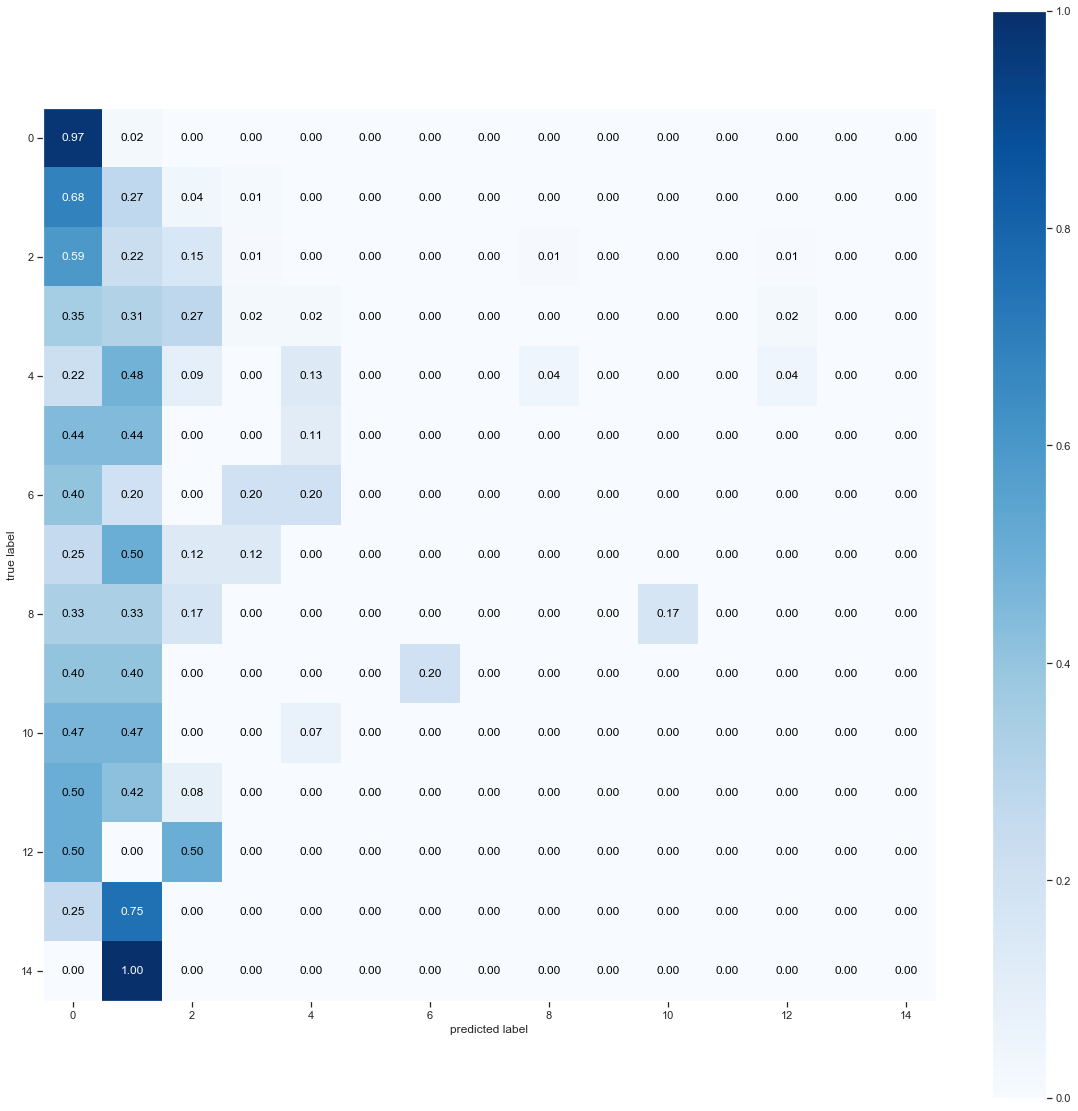

In [37]:
print("Confusion Matrix Plot")
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                               figsize=(20, 20))
plt.show()

In [38]:
print("Classification Report")
print(classification_report(y_test,predicted))

Classification Report
              precision    recall  f1-score   support

           1       0.86      0.97      0.91      3983
           2       0.50      0.27      0.35       701
           3       0.34      0.15      0.21       175
           4       0.05      0.02      0.03        51
           5       0.43      0.13      0.20        23
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         4
          24       0.00      0.00      0.00         1

    accuracy                           0.82      5000
   macro avg       0.15      0.10      0.11      5000
weig

C:\Users\drago\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    knn.fit(x_train, y_train)
    kFoldTotal += knn.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, knn.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nKNN mean score [5 folds] = " + str(roundedTotal))

[fold 0] score: 0.82050
[fold 1] score: 0.82800
[fold 2] score: 0.82900
[fold 3] score: 0.79900
[fold 4] score: 0.81750

KNN mean score [5 folds] = 0.8188
